In [1]:
import sys
sys.path.append("../")
from regressor.regressor import Regressor, r_square, rmse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
c:\programdata\miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\miniconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
columns = ["ppd_temp", "ppd_hum", "ppd_dvin", "ppd_vvin", "ppd_precip", "ppd_radsol", "ppd_patm",
           "pd_temp", "pd_hum", "pd_dvin", "pd_vvin", "pd_precip", "pd_radsol", "pd_patm",
           "code", "date", "time", "temp", "hum", "dir.vin", "vel.vin", "precip", 
           "rad.sol", "p.atm", "datetime+14hrs", "date+14hrs", "target"]
data0 = np.load("../data/processed/dataset2.npy", allow_pickle=True)
df0 = pd.DataFrame(data0, columns=columns)
df = df0.drop(['code', 'date', 'time', 'datetime+14hrs', 'date+14hrs'], axis=1)
df.head()

,ppd_temp,ppd_hum,ppd_dvin,ppd_vvin,ppd_precip,ppd_radsol,ppd_patm,pd_temp,pd_hum,pd_dvin,...,pd_radsol,pd_patm,temp,hum,dir.vin,vel.vin,precip,rad.sol,p.atm,target
0,-0.1,97.1,251.2,0,0,0,1009,2.2,96.3,128.9,...,0,1017,6.1,95.8,142.4,0,0,0,1012,4.9
1,2.2,96.3,128.9,0,0,0,1017,4.9,97.3,125.1,...,0,1011,3.2,93.1,231.7,0,0.4,0,1020,0.3
2,4.9,97.3,125.1,0,0,0,1011,0.3,94.8,185.6,...,10.4,1027,0.6,90.1,130.5,0,0,0,1028,-0.9
3,0.3,94.8,185.6,0,0,10.4,1027,-0.9,73.7,114.3,...,5.4,1028,-0.9,82.5,146.5,0,0,0,1024,-4
4,-0.9,73.7,114.3,0,0,5.4,1028,-4,93.8,126.8,...,0,1031,-2.9,88.5,141.3,0,0,0,1031,-6.5


In [80]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
data = scaler.transform(df)
X = data[:,:-1]
y = data[:,-1]
stratify = np.array(df["target"] <= 0).astype(int)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1, stratify=stratify)

In [84]:
in_dim = X_train.shape[1]
out_dim = 1
print(in_dim, out_dim)

21 1


Generando los datos de entrenamiento y prueba, el regressor siempre funciona igual. debemos dar el in_dim y out_dim segun nuestros datos y podemos definir toda metrica que querramos. Si quieren usar early_stopping, borren el kwarg de early_stopping=None y lo usara por defecto

In [85]:
reg = Regressor(input_dim=in_dim, output_dim=out_dim, n=2, layer_size=200, 
                loss='mean_squared_error', optimizer='adam', metrics=['mae', rmse, r_square], early_stopping=None)

In [86]:
reg.build()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               4400      
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 201       
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = reg.fit(X_train, y_train, epochs=20, batch_size=200, validation_split=0.2, shuffle=True)

Train on 32760 samples, validate on 8191 samples
Epoch 1/20
32760/32760 [==============================] - 1s 17us/step - loss: 0.0198 - mean_absolute_error: 0.0896 - rmse: 0.0896 - r_square: -0.2586 - val_loss: 0.0051 - val_mean_absolute_error: 0.0573 - val_rmse: 0.0573 - val_r_square: 0.6737
Epoch 2/20
32760/32760 [==============================] - 0s 7us/step - loss: 0.0050 - mean_absolute_error: 0.0569 - rmse: 0.0569 - r_square: 0.6850 - val_loss: 0.0047 - val_mean_absolute_error: 0.0551 - val_rmse: 0.0551 - val_r_square: 0.7024
Epoch 3/20
32760/32760 [==============================] - 0s 7us/step - loss: 0.0047 - mean_absolute_error: 0.0553 - rmse: 0.0553 - r_square: 0.7042 - val_loss: 0.0044 - val_mean_absolute_error: 0.0538 - val_rmse: 0.0538 - val_r_square: 0.7173
Epoch 4/20
32760/32760 [==============================] - 0s 7us/step - loss: 0.0046 - mean_absolute_error: 0.0545 - rmse: 0.0545 - r_square: 0.7126 - val_loss: 0.0044 - val_mean_absolute_error: 0.0535 - val_rmse: 0.0

evaluando test
10238/10238 [==============================] - 0s 11us/step
    EVALUATION RESULTS :  
loss: 0.00
mean_absolute_error: 0.05
rmse: 0.05
r_square: 0.72


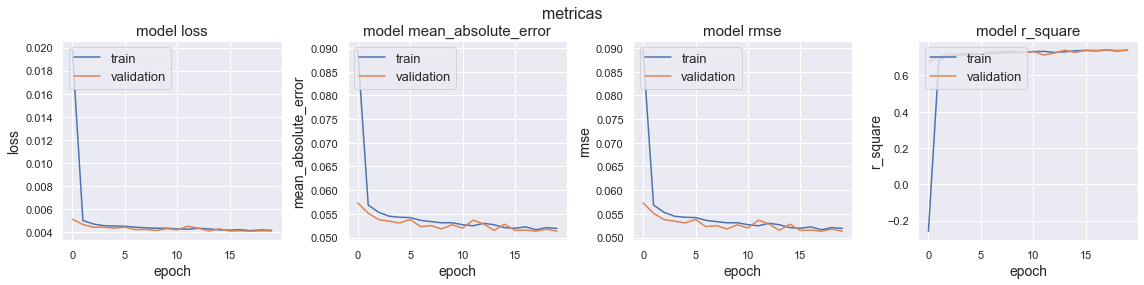

In [88]:
reg.plot_metrics()
scores = reg.evaluate(X_test, y_test)

In [89]:
y_pred = reg.predict(X_test).reshape(1,-1)[0]

In [90]:
dmin = scaler.data_min_[-1]
dmax = scaler.data_max_[-1]
y_pred2 = y_pred * (dmax - dmin) + dmin
y_test2 = y_test * (dmax - dmin) + dmin

In [91]:
g1 = y_test2 <= 0
g2 = y_test2 > 0

y_predg1 = y_pred2[g1]
y_testg1 = y_test2[g1]
y_predg2 = y_pred2[g2]
y_testg2 = y_test2[g2]

g3 = y_predg1 > 0
g4 = y_predg1 <= 0

y_predg3 = y_predg1[g3]
y_testg3 = y_testg1[g3]
y_predg4 = y_predg1[g4]
y_testg4 = y_testg1[g4]

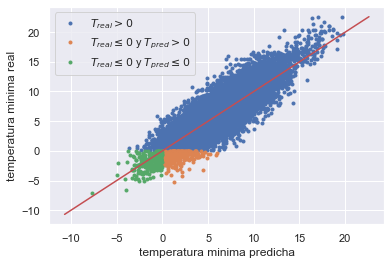

In [100]:
plt.plot(y_predg2, y_testg2, '.', label=r'$T_{real} > 0$')
plt.plot(y_predg3, y_testg3, '.', label=r'$T_{real} \leq 0$ y $T_{pred} > 0$')
plt.plot(y_predg4, y_testg4, '.', label=r'$T_{real} \leq 0$ y $T_{pred} \leq 0$')
plt.plot([dmin, dmax], [dmin, dmax])
plt.xlabel("temperatura minima predicha")
plt.ylabel("temperatura minima real")
plt.legend()

In [94]:
def rmse(pred, test):
    return np.sqrt(np.mean(np.square(pred - test), axis=-1))

In [96]:
rmse(y_pred, y_test)

0.06517425524441399